<a href="https://colab.research.google.com/github/Leopyrl/My-profile/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN STEP 1. IMPORT LIBRARIES**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
files.upload()
df = pd.read_excel('AI for Finance.xlsx', sheet_name='Dataset')

Saving AI for Finance.xlsx to AI for Finance.xlsx


In [ ]:
df.head(5)

,Date,Price of (y),Price of (x1),Price of (x2),Price of (x3),Price of (x4),Price of (x5),Return of y,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
0,Currency,EUR,EUR,EUR,EUR,EUR,USD,EUR,NaN,EUR,EUR,EUR,EUR,USD
1,NaN,Hermes (y),CAC40 (x1),LVMH (x2),Airbus (x3),L'OREAL (x4),Landy Leather (x5),Hermes (y),Direction of Hermes (y),CAC40 (x1),LVMH (x2),Airbus (x3),L'OREAL (x4),Landy Leather (x5)
2,2024-03-01 00:00:00,2308,7934.17,846.4,151.71,441.95,3.0198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-04 00:00:00,2300,7956.41,839.8,154.41,443.6,2.9509,-0.003466,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,2266.5,7932.82,829.1,156.62,438.35,2.981,-0.014565,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102


# **KNN STEP 2. DATA PREPARATION**

In [ ]:
df.dropna(axis=0, inplace=True) # we drop the missing values as well as non neccessary rows

In [ ]:
df.head()

,Date,Price of (y),Price of (x1),Price of (x2),Price of (x3),Price of (x4),Price of (x5),Return of y,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,2024-03-04 00:00:00,2300,7956.41,839.8,154.41,443.6,2.9509,-0.003466,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,2266.5,7932.82,829.1,156.62,438.35,2.981,-0.014565,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102
5,2024-03-06 00:00:00,2271.5,7954.74,832.6,157.27,438.15,2.9721,0.002206,Up,0.002763,0.004221,0.00415,-0.0005,-0.002986
6,2024-03-07 00:00:00,2315,8016.22,839.8,157.37,445.35,2.9524,0.01915,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,2024-03-08 00:00:00,2313,8028.01,844.9,157.09,449,2.955,-0.000864,Down,0.001471,0.006073,-0.001779,0.0082,0.000881


In [ ]:
columns_to_drop = ['Date', 'Price of (y)', 'Price of (x1)', 'Price of (x2)', 'Price of (x3)', 'Price of (x4)', 'Price of (x5)', 'Return of y']
for column in columns_to_drop:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True) # here we drop the unneccessary data

In [ ]:
df.head()

,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102
5,Up,0.002763,0.004221,0.00415,-0.0005,-0.002986
6,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,Down,0.001471,0.006073,-0.001779,0.0082,0.000881


{'whiskers': [<matplotlib.lines.Line2D at 0x79da4fc90150>,
 'caps': [<matplotlib.lines.Line2D at 0x79da4fb917d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79da4fb5f850>],
 'medians': [<matplotlib.lines.Line2D at 0x79da4fb81790>],
 'fliers': [<matplotlib.lines.Line2D at 0x79da4fb80790>],
 'means': []}

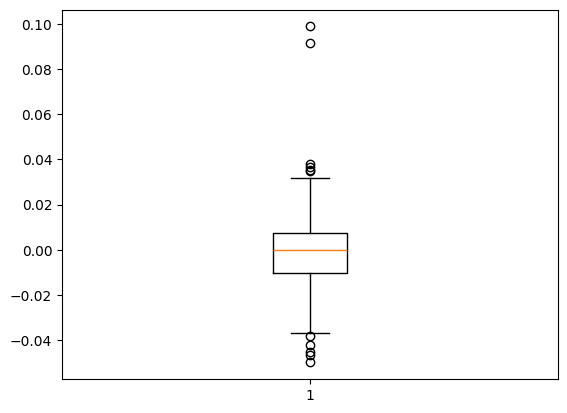

In [ ]:
plt.boxplot(df['Return of (x2)']) # here we see that we have outliers but we keep them because in the stock markets there are sometimes abnormal value

In [ ]:
x = df.drop('Direction of (y)', axis=1)
y = df['Direction of (y)']

In [ ]:
y.value_counts()

,count
Direction of (y),
Up,134
Down,120


In [ ]:
!pip install -U IMBALANCED-LEARN # install the "Imbalanced learn" library to deal with the imbalance dataset
from imblearn.under_sampling import RandomUnderSampler

<Axes: ylabel='count'>

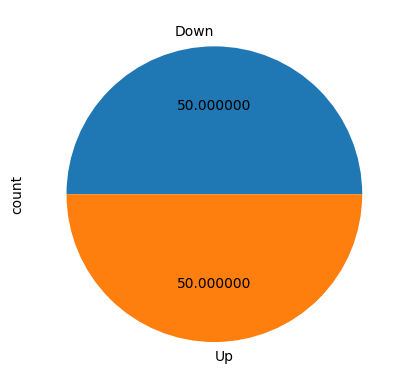

In [ ]:
rus = RandomUnderSampler(sampling_strategy="not minority")
x_rus, y_rus = rus.fit_resample(x,y)
y_rus.value_counts()
y_rus.value_counts().plot.pie(autopct='%2f')

In [ ]:
rus_df = pd.concat([x_rus, y_rus],axis=1)
rus_df

,Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5),Direction of (y)
3,0.002803,-0.007798,0.017797,0.0037,-0.022816,Down
4,-0.002965,-0.012741,0.014313,-0.0118,0.0102,Down
7,0.001471,0.006073,-0.001779,0.0082,0.000881,Down
8,-0.001031,0.00651,-0.007957,-0.0017,0.004704,Down
12,0.000359,-0.01203,0.014996,-0.0113,0.024374,Down
...,...,...,...,...,...,...
220,0.00508,0.019349,-0.012612,0.0014,-0.033572,Up
112,0.01907,0.015276,0.022099,0.0149,-0.000427,Up
33,0.006164,0.028396,0.00566,0.0076,0.013397,Up
78,0.01336,0.009335,0.005543,0.0137,-0.015206,Up


# **KNN STEP 3. DATA TRANSFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 3 to 256
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Direction of (y)  254 non-null    object
 1   Return of (x1)    254 non-null    object
 2   Return of (x2)    254 non-null    object
 3   Return of (x3)    254 non-null    object
 4   Return of (x4)    254 non-null    object
 5   Return of (x5)    254 non-null    object
dtypes: object(6)
memory usage: 22.0+ KB


In [ ]:
df['Direction of (y)'] = df['Direction of (y)'].astype('category')
df['Return of (x1)'] = df['Return of (x1)'].astype('float64')
df['Return of (x2)'] = df['Return of (x2)'].astype('float64')
df['Return of (x3)'] = df['Return of (x3)'].astype('float64')
df['Return of (x4)'] = df['Return of (x4)'].astype('float64')
df['Return of (x5)'] = df['Return of (x5)'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 3 to 256
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Direction of (y)  254 non-null    category
 1   Return of (x1)    254 non-null    float64 
 2   Return of (x2)    254 non-null    float64 
 3   Return of (x3)    254 non-null    float64 
 4   Return of (x4)    254 non-null    float64 
 5   Return of (x5)    254 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 20.4 KB


In [ ]:
df['Direction of (y)'].value_counts()

,count
Direction of (y),
Up,134
Down,120


# **KNN STEP 4. DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Up = 'Up'
Down = 'Down'

In [ ]:
y.replace((Up, Down), (1, 0), inplace=True)

<ipython-input-21-9b73864f0f87>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace((Up, Down), (1, 0), inplace=True)


In [ ]:
df.head()

,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,0,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,0,-0.002965,-0.012741,0.014313,-0.0118,0.010200
5,1,0.002763,0.004221,0.004150,-0.0005,-0.002986
6,1,0.007729,0.008648,0.000636,0.0164,-0.006628
7,0,0.001471,0.006073,-0.001779,0.0082,0.000881


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# **KNN STEP 5. STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
stand_x_train = scaler.transform(x_train)


In [ ]:
df_stand_x_train = pd.DataFrame(stand_x_train, columns=x_train.columns)

In [ ]:
df_stand_x_train.head()

,Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
0,-0.231061,-0.232015,0.339746,-1.169971,1.712690
1,-1.310005,-2.530379,-0.801366,-1.002042,-1.102921
2,0.652726,-0.046170,2.577381,0.936143,0.041199
3,1.122797,1.005258,0.723569,0.698243,-0.175001
4,-0.032152,-0.034974,-0.303444,-0.484260,0.672136


In [ ]:
stand_x_test = scaler.transform(x_test)
df_stand_x_test = pd.DataFrame(stand_x_test, columns=x_test.columns)
df_stand_x_test.head()

,Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
0,-0.754786,-0.684498,0.158476,-0.099421,0.397829
1,0.337215,0.233202,0.483402,-0.176389,0.451740
2,-0.558079,0.433927,-0.697533,-0.120413,0.175131
3,-0.087567,-0.037322,-0.460178,0.733228,0.036618
4,-1.231703,-0.987384,0.306590,-2.597371,-0.146950


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(df_stand_x_train, y_train)
  y_pred = knn.predict(df_stand_x_test)
  error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

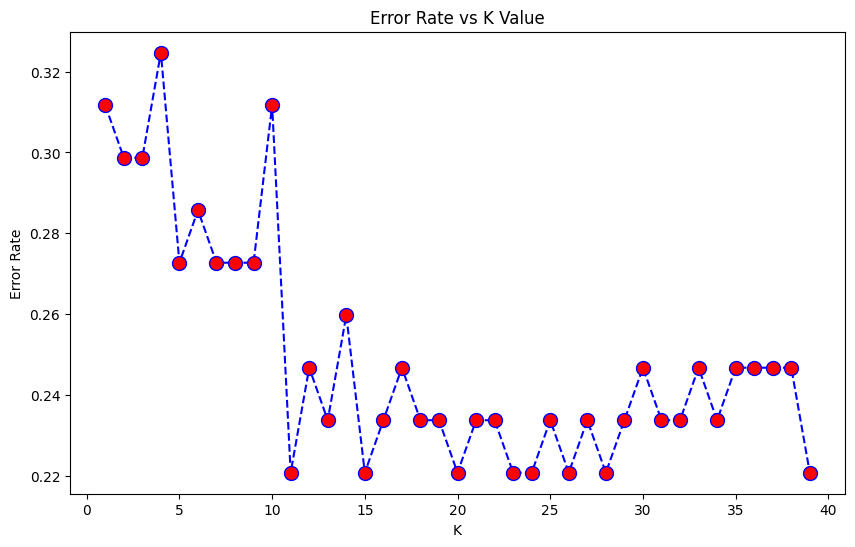

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# model building
knn = KNeighborsClassifier(n_neighbors=15)

# model training
knn.fit(df_stand_x_train, y_train)

# prediction generation
y_pred = knn.predict(df_stand_x_test)

In [ ]:
# import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# model performance with the optimal "k" number (K=15)

# model building
knn = KNeighborsClassifier(n_neighbors=15)

# model training
knn.fit(df_stand_x_train, y_train)

# prediction generation
y_pred = knn.predict(df_stand_x_test)

# to print "WITH K=15"
print("WITH K=15")

# add spacing between output lines
print('\n')

# to print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# add spacing between output lines
print('\n')

# to print the other performance metrics
print(classification_report(y_test, y_pred))

WITH K=15


[[22 10]
 [ 7 38]]


              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.79      0.84      0.82        45

    accuracy                           0.78        77
   macro avg       0.78      0.77      0.77        77
weighted avg       0.78      0.78      0.78        77



# **DT STEP 1. IMPORT LIBRARIES**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DT STEP 2. DATA IMPORT**

---

In [ ]:
from google.colab import files
files.upload()

Saving AI for Finance.xlsx to AI for Finance (1).xlsx


{'AI for Finance (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x1f\x96\xec\xea\x0b\x02\x00\x00\xe4\x0b\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
df2 = pd.read_excel('AI for Finance.xlsx', sheet_name='Dataset')

In [ ]:
df2.head()

,Date,Price of (y),Price of (x1),Price of (x2),Price of (x3),Price of (x4),Price of (x5),Return of y,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
0,Currency,EUR,EUR,EUR,EUR,EUR,USD,EUR,NaN,EUR,EUR,EUR,EUR,USD
1,NaN,Hermes (y),CAC40 (x1),LVMH (x2),Airbus (x3),L'OREAL (x4),Landy Leather (x5),Hermes (y),Direction of Hermes (y),CAC40 (x1),LVMH (x2),Airbus (x3),L'OREAL (x4),Landy Leather (x5)
2,2024-03-01 00:00:00,2308,7934.17,846.4,151.71,441.95,3.0198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-04 00:00:00,2300,7956.41,839.8,154.41,443.6,2.9509,-0.003466,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,2266.5,7932.82,829.1,156.62,438.35,2.981,-0.014565,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102


# **DT STEP 3. DATA PREPARATION**

---

In [ ]:
df2.isnull().sum().sum()

np.int64(9)

In [ ]:
df2.isnull().sum(axis=0)

,0
Date,1
Price of (y),0
Price of (x1),0
Price of (x2),0
Price of (x3),0
Price of (x4),0
Price of (x5),0
Return of y,1
Direction of (y),2
Return of (x1),1


In [ ]:
df2.isnull().sum(axis=1)

,0
0,1
1,1
2,7
3,0
4,0
...,...
252,0
253,0
254,0
255,0


In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2

,Date,Price of (y),Price of (x1),Price of (x2),Price of (x3),Price of (x4),Price of (x5),Return of y,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,2024-03-04 00:00:00,2300,7956.41,839.8,154.41,443.6,2.9509,-0.003466,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,2266.5,7932.82,829.1,156.62,438.35,2.981,-0.014565,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102
5,2024-03-06 00:00:00,2271.5,7954.74,832.6,157.27,438.15,2.9721,0.002206,Up,0.002763,0.004221,0.00415,-0.0005,-0.002986
6,2024-03-07 00:00:00,2315,8016.22,839.8,157.37,445.35,2.9524,0.01915,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,2024-03-08 00:00:00,2313,8028.01,844.9,157.09,449,2.955,-0.000864,Down,0.001471,0.006073,-0.001779,0.0082,0.000881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2025-02-24 00:00:00,2694,8090.99,692.1,164.34,347.75,3.5916,-0.020007,Down,-0.00779,-0.014664,0.027125,0.0048,-0.026719
253,2025-02-25 00:00:00,2709,8051.07,684.2,164.1,347.75,3.2242,0.005568,Up,-0.004934,-0.011415,-0.00146,0,-0.102294
254,2025-02-26 00:00:00,2725,8143.92,700.3,167.52,350.55,3.09,0.005906,Up,0.011533,0.023531,0.020841,0.0081,-0.041623
255,2025-02-27 00:00:00,2714,8102.52,693.1,165.14,350.1,3.1441,-0.004037,Down,-0.005084,-0.010281,-0.014207,-0.0013,0.017508


In [ ]:
df2['Return of (x1)'].fillna(value=df['Return of (x1)'].mean())

<ipython-input-45-ba5a69c6fa7c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Return of (x1)'].fillna(value=df['Return of (x1)'].mean())


,Return of (x1)
3,0.002803
4,-0.002965
5,0.002763
6,0.007729
7,0.001471
...,...
252,-0.007790
253,-0.004934
254,0.011533
255,-0.005084


In [ ]:
df2['Return of (x2)'].fillna(value=df['Return of (x2)'].mean())

<ipython-input-46-0a4f6708a6e4>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Return of (x2)'].fillna(value=df['Return of (x2)'].mean())


,Return of (x2)
3,-0.007798
4,-0.012741
5,0.004221
6,0.008648
7,0.006073
...,...
252,-0.014664
253,-0.011415
254,0.023531
255,-0.010281


In [ ]:
df2['Return of (x3)'].fillna(value=df['Return of (x3)'].mean())

<ipython-input-47-dde691db55cc>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Return of (x3)'].fillna(value=df['Return of (x3)'].mean())


,Return of (x3)
3,0.017797
4,0.014313
5,0.004150
6,0.000636
7,-0.001779
...,...
252,0.027125
253,-0.001460
254,0.020841
255,-0.014207


In [ ]:
df2['Return of (x4)'].fillna(value=df['Return of (x4)'].mean())

<ipython-input-48-2ce2acfd8a99>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Return of (x4)'].fillna(value=df['Return of (x4)'].mean())


,Return of (x4)
3,0.0037
4,-0.0118
5,-0.0005
6,0.0164
7,0.0082
...,...
252,0.0048
253,0.0000
254,0.0081
255,-0.0013


In [ ]:
df2['Return of (x5)'].fillna(value=df['Return of (x5)'].mean())

<ipython-input-49-a344832eb33c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Return of (x5)'].fillna(value=df['Return of (x5)'].mean())


,Return of (x5)
3,-0.022816
4,0.010200
5,-0.002986
6,-0.006628
7,0.000881
...,...
252,-0.026719
253,-0.102294
254,-0.041623
255,0.017508


In [ ]:
if 'Date' in df.columns:
    df.drop2('Date', axis=1, inplace=True)
else:
    print("Column 'Date' not found in DataFrame")

Column 'Date' not found in DataFrame


In [ ]:
df2.head()

,Date,Price of (y),Price of (x1),Price of (x2),Price of (x3),Price of (x4),Price of (x5),Return of y,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,2024-03-04 00:00:00,2300,7956.41,839.8,154.41,443.6,2.9509,-0.003466,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,2266.5,7932.82,829.1,156.62,438.35,2.981,-0.014565,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102
5,2024-03-06 00:00:00,2271.5,7954.74,832.6,157.27,438.15,2.9721,0.002206,Up,0.002763,0.004221,0.00415,-0.0005,-0.002986
6,2024-03-07 00:00:00,2315,8016.22,839.8,157.37,445.35,2.9524,0.01915,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,2024-03-08 00:00:00,2313,8028.01,844.9,157.09,449,2.955,-0.000864,Down,0.001471,0.006073,-0.001779,0.0082,0.000881


In [ ]:
df2.drop('Price of (y)', axis=1, inplace=True)
df2.drop('Price of (x1)', axis=1, inplace=True)
df2.drop('Price of (x2)', axis=1, inplace=True)
df2.drop('Price of (x3)', axis=1, inplace=True)
df2.drop('Price of (x4)', axis=1, inplace=True)
df2.drop('Price of (x5)', axis=1, inplace=True)
df2.drop('Return of y', axis=1, inplace=True)


In [ ]:
df2.head()

,Date,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,2024-03-04 00:00:00,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,Down,-0.002965,-0.012741,0.014313,-0.0118,0.0102
5,2024-03-06 00:00:00,Up,0.002763,0.004221,0.00415,-0.0005,-0.002986
6,2024-03-07 00:00:00,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,2024-03-08 00:00:00,Down,0.001471,0.006073,-0.001779,0.0082,0.000881


In [ ]:
x = df.drop('Direction of (y)', axis=1)
y = df['Direction of (y)']

In [ ]:
y.value_counts()

,count
Direction of (y),
Up,134
Down,120


In [ ]:
!pip install -U IMBALANCED-LEARN # install the "Imbalanced learn" library to deal with the imbalance dataset
from imblearn.under_sampling import RandomUnderSampler

<Axes: ylabel='count'>

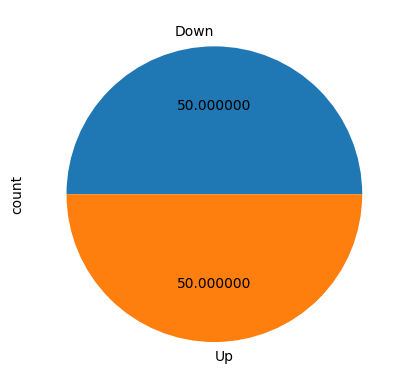

In [ ]:
rus = RandomUnderSampler(sampling_strategy="not minority")
x_rus, y_rus = rus.fit_resample(x,y)
y_rus.value_counts()
y_rus.value_counts().plot.pie(autopct='%2f')

In [ ]:
rus_df = pd.concat([x_rus, y_rus],axis=1)
rus_df

,Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5),Direction of (y)
3,0.002803,-0.007798,0.017797,0.0037,-0.022816,Down
4,-0.002965,-0.012741,0.014313,-0.0118,0.010200,Down
7,0.001471,0.006073,-0.001779,0.0082,0.000881,Down
8,-0.001031,0.006510,-0.007957,-0.0017,0.004704,Down
12,0.000359,-0.012030,0.014996,-0.0113,0.024374,Down
...,...,...,...,...,...,...
197,0.006596,0.001641,0.014072,0.0111,0.009688,Up
122,0.005209,0.001475,0.004477,0.0140,-0.036840,Up
128,0.008351,0.016812,-0.002130,0.0183,-0.005497,Up
20,0.002451,0.010343,0.005601,0.0116,-0.001643,Up


# **DT STEP 4. DATA TRANSFORMATION**

---

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 3 to 256
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              254 non-null    object
 1   Direction of (y)  254 non-null    object
 2   Return of (x1)    254 non-null    object
 3   Return of (x2)    254 non-null    object
 4   Return of (x3)    254 non-null    object
 5   Return of (x4)    254 non-null    object
 6   Return of (x5)    254 non-null    object
dtypes: object(7)
memory usage: 24.0+ KB


In [ ]:
df2['Direction of (y)'] = df['Direction of (y)'].astype('category')

In [ ]:
df2['Return of (x1)'] = df['Return of (x1)'].astype('float64')

In [ ]:
df2['Return of (x2)'] = df['Return of (x2)'].astype('float64')

In [ ]:
df2['Return of (x3)'] = df['Return of (x3)'].astype('float64')

In [ ]:
df2['Return of (x4)'] = df['Return of (x4)'].astype('float64')

In [ ]:
df2['Return of (x5)'] = df['Return of (x5)'].astype('float64')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 3 to 256
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Date              254 non-null    object  
 1   Direction of (y)  254 non-null    category
 2   Return of (x1)    254 non-null    float64 
 3   Return of (x2)    254 non-null    float64 
 4   Return of (x3)    254 non-null    float64 
 5   Return of (x4)    254 non-null    float64 
 6   Return of (x5)    254 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 22.4+ KB


# **DT STEP 5. DATA SPLITTING**

---

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Up = 'Up'
Down = 'Down'

In [ ]:
y.replace((Up, Down), (1, 0), inplace=True)

<ipython-input-69-9b73864f0f87>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace((Up, Down), (1, 0), inplace=True)
<ipython-input-69-9b73864f0f87>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y.replace((Up, Down), (1, 0), inplace=True)


In [ ]:
df2.head()

,Date,Direction of (y),Return of (x1),Return of (x2),Return of (x3),Return of (x4),Return of (x5)
3,2024-03-04 00:00:00,Down,0.002803,-0.007798,0.017797,0.0037,-0.022816
4,2024-03-05 00:00:00,Down,-0.002965,-0.012741,0.014313,-0.0118,0.010200
5,2024-03-06 00:00:00,Up,0.002763,0.004221,0.004150,-0.0005,-0.002986
6,2024-03-07 00:00:00,Up,0.007729,0.008648,0.000636,0.0164,-0.006628
7,2024-03-08 00:00:00,Down,0.001471,0.006073,-0.001779,0.0082,0.000881


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# **DT STEP 6. DT ALGORITHM**

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = dtree.predict(x_test)

# **STEP 7. PERFORMANCE MEASURE**

---

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[25 15]
 [ 5 32]]


              precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.68      0.86      0.76        37

    accuracy                           0.74        77
   macro avg       0.76      0.74      0.74        77
weighted avg       0.76      0.74      0.74        77



# **DT STEP 8. DECISION TREE**

---

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
y.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

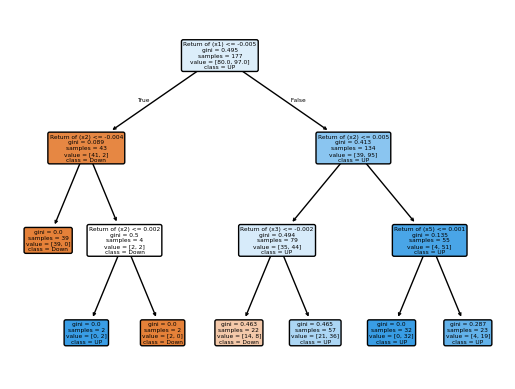

In [ ]:
tree.plot_tree(dtree, feature_names = x.columns, class_names=['Down', 'UP'], rounded=True, filled = True);

# **RANDOM FOREST**

---

# **RF STEP 1. DATA IMPORT**

---

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df3 = pd.read_excel('AI for Finance.xlsx', sheet_name='Dataset')

In [ ]:
df3.head()

# **RF STEP 2. DATA PREPARATION**

---

In [ ]:
df3.isnull().sum().sum()

In [ ]:
df3.isnull().sum(axis=0)

In [ ]:
df3.isnull().sum(axis=1)

In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3

In [ ]:
df3['Return of (x1)'].fillna(value=df['Return of (x1)'].mean())

In [ ]:
df3['Return of (x2)'].fillna(value=df['Return of (x2)'].mean())

In [ ]:
df3['Return of (x3)'].fillna(value=df['Return of (x3)'].mean())

In [ ]:
df3['Return of (x4)'].fillna(value=df['Return of (x4)'].mean())

In [ ]:
df3['Return of (x5)'].fillna(value=df['Return of (x5)'].mean())

In [ ]:
if 'Date' in df.columns:
    df3.drop('Date', axis=1, inplace=True)
else:
    print("Column 'Date' not found in DataFrame")

In [ ]:
df3.head()

In [ ]:
df3.drop('Price of (y)', axis=1, inplace=True)
df3.drop('Price of (x1)', axis=1, inplace=True)
df3.drop('Price of (x2)', axis=1, inplace=True)
df3.drop('Price of (x3)', axis=1, inplace=True)
df3.drop('Price of (x4)', axis=1, inplace=True)
df3.drop('Price of (x5)', axis=1, inplace=True)
df3.drop('Return of y', axis=1, inplace=True)

In [ ]:
df3.head()

# **RF STEP 11. DATA TRANSFORMATION**

---

In [ ]:
df3.info()

In [ ]:
pd.get_dummies(df3['Direction of (y)'], dtype=float).head()

In [ ]:
pd.get_dummies(df3['Return of (x1)'], dtype=float).head()

In [ ]:
pd.get_dummies(df3['Return of (x2)'], dtype=float).head()

In [ ]:
pd.get_dummies(df3['Return of (x4)'], dtype=float).head()

In [ ]:
df3.info()

In [ ]:
gen = pd.get_dummies(df2[['Direction of (y)', 'Return of (x1)', 'Return of (x2)',  'Return of (x4)']], dtype=float, drop_first=True)

In [ ]:
gen.head()

In [ ]:
df4 = pd.concat([df2, gen], axis=1)
df4.head()

In [ ]:
df4.drop(['Return of (x3)', 'Return of (x5)'], axis=1, inplace=True)
df4.head()

In [ ]:
df4.info()

# **RF STEP 12. DATA SPLITING**

---

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Up = 'Up'
Down = 'Down'

In [ ]:
y.replace((Up, Down), (1, 0), inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# **RF STEP 13. MODEL BUILDING**

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

# **RF STEP 14. PERFORMANCE MEASURE**

---

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

## **NN STEP 1. IMPORT LIBRARIES**

In [ ]:
import pandas as pd # we use pandas to read the dataset and drop columns, ckeck for missing values and convert the data types.
import matplotlib.pyplot as plt # we use matplotlib to create boxplot to detect extreme values in the stock return’s data

In [ ]:
from google.colab import files # prepare to import file to google collab

In [ ]:
files.upload() # load data into google collab
df5 = pd.read_excel('AI for Finance.xlsx', sheet_name='Dataset') # assign a name to read the dataset
df5.head() # read the 5 first row of the dataset

## **NN STEP 2. DATA PREPARATION**

In [ ]:
df5.dropna(axis=0, inplace=True) # we remove any row or column with missing values

In [ ]:
df5.head() # we read the 5 first row of the dataset

In [ ]:
plt.boxplot(df5['Price of (y)']) # we create a boxplot of the values in the column ‘Price of (y)’ to detects extreme values

The boxplot shows a few outliers above. We might think first that they are values that do not belong to the population and be tempt to remove them. But this is a particular case. The values can only belong to the population because we are talking about stocks. And it makes sense that there are outliers since we know the market is a highly volatile place. But we want to keep the dataet as loyal as possible to the original data, so we choose to keep those outliers and extreme values.

Plus, this column of raw data will be remplaced by the simple value 'up' and 'down'. And as long as those are balanced, we are good.

In [ ]:
# we check if there is a column 'Unnamed: 0' before attempting to drop it
if 'Date' in df.columns:
    df5.drop('Date', axis=1, inplace=True) # we remove the column ‘Unnamed: 0’ from the data if it exists
    # we drop ‘Unnamed: 0’ because it is the automatic column added when we save the excel file and we don’t want it
    # we remove it for a cleaner dataset
    print("Date' dropped successfully.")
else:
    print("Column 'Date' not found in DataFrame.")

In [ ]:
df5.head() # read the 5 first row of the dataset

In [ ]:
# we remove the columns that contain raw stock
# indeed, we want to work only on daily return here
# the stock prices will only interfere with the analysis
for col in ['Price of (y)', 'Price of (x1)', 'Price of (x2)', 'Price of (x3)', 'Price of (x4)', 'Price of (x5)', 'Return of y']:
    try:
        df5.drop(col, axis=1, inplace=True)
    except KeyError:
        print(f"Column '{col}' not found in DataFrame, skipping.")

In [ ]:
df5.head() # read the 5 first row of the dataset

In [ ]:
x = df5.drop('Direction of (y)', axis=1) # we drop the column of the target (‘Direction of y’) to only keep the features because this is what the model is learning from
y = df5['Direction of (y)'] #  we extract the target (y variable) because we want to predict it

In [ ]:
y.value_counts() # we count the number of each class (up and down) to ensure a balanced dataset

The dataset is not balance (by a little), so we chose the undersampling to avoid recreating the abnormal points that we left earlier with an oversampling.

In [ ]:
!pip install -U IMBALANCED-LEARN # install the "Imbalanced learn" library to deal with the imbalance dataset
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(sampling_strategy="not minority")
x_rus, y_rus = rus.fit_resample(x,y)
y_rus.value_counts()
y_rus.value_counts().plot.pie(autopct='%2f')

In [ ]:
rus_df = pd.concat([x_rus, y_rus],axis=1)
rus_df

# **NN STEP 3. DATA TRANSFORMATION**

In [ ]:
df5.info() # we want to display the column names, data types, and non-null values in the dataset to check if corrections are needed

In [ ]:
df5['Direction of (y)'] = df5['Direction of (y)'].astype('category') # convert the column ‘Direction of y’ into a categorical data type
# indeed, this column represents the stock return’s direction
# so ‘up’ and ‘down’ is a categorical variable
# ensure that the daily returns of our features are stored as decimal (floating) numbers
df5['Return of (x1)'] = df5['Return of (x1)'].astype('float64')
df5['Return of (x2)'] = df5['Return of (x2)'].astype('float64')
df5['Return of (x3)'] = df5['Return of (x3)'].astype('float64')

In [ ]:
df5.info() # we want to display the column names, data types, and non-null values in the dataset to check if corrections are needed

In [ ]:
df5['Direction of (y)'].value_counts() # we count the number of each class (up and down) in the direction of the Hermes daily return (target), to ensure a balanced dataset

# **NN STEP 4. DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split # we import the model to split the dataset into training and testing sets

In [ ]:
# define the ‘up’ and ‘down’ into the code
Up = 'Up'
Down = 'Down'

In [ ]:
import numpy as np
x = df5.drop('Direction of (y)',axis=1).to_numpy()
y = df5['Direction of (y)'].to_numpy()

y = np.where(y == Up, 1, np.where(y == Down, 0, y))
# Instead of using replace on the NumPy array, reassign y with the desired values
y = np.where(y == 'Up', 1, np.where(y == 'Down', 0, y)) # define ‘up’ as class 1 and ‘down’ as class 0

In [ ]:
df5.head() # read the 5 first row of the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) # split the dataset into 30% for testing and 70% for training and make sure we have the same split every time to not have variable results

# **NN STEP 5. NN ALGORITHM**

### A. LIBRARIES

In [ ]:
import tensorflow as tf  # import the machine learning (ML) library
from tensorflow.keras.models import Sequential # import the Neutral Network (NN) model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation # we import the model needed to define the neurons
from tensorflow.keras.optimizers import Adam

### B. MODEL BUILDING

In [ ]:
model = Sequential() # we create a neural network model
model.add(Dense(units=5,activation='relu')) # the first layer has 5 neurons because we have 5 features
# the number of neurons were chosen experimentally to prevent overfitting or underfitting the values
# ‘ReLU activation’ introduces non-linearity to the model and prevents neurons from being stuck at zero
model.add(Dense(units=3,activation='relu')) # the second layer has 3 neurons
# we reduce the number of neurons in the second layer to extract the most important features from the previous layer
model.add(Dense(units=1,activation='sigmoid')) # output layer is only need 1 neuron to predict ‘up’ or ‘down’ since is it binary
# the output will be : if the probability is closer to 1, then it is more likely to be ‘up’ ; and if if the probability is closer to 0, then it is more likely to be ‘down’
model.compile(loss='binary_crossentropy', optimizer='adam') # we use the function binary since it is a binary classification. We try to see how far off the model's predictions are from the actual values and adjust the weights accordingly

Through experimental try, it appears that our loss function has a problem. Indeed, even thought our dataset is balanced, we keep only get 1 class predicted. To prevent this, we can adjust the weight to give more importance to the class not represented.

### C. MODEL TRAINING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # we tell the model to stop training early if the model stops improving to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=50) # we stop training if the model was run 30 times without improvements

In [ ]:
# we proceed with the model training
x_train = x_train.astype(np.float64)  # Convert x_train to float64
x_test = x_test.astype(np.float64)  # Convert x_test to float64
y_train = y_train.astype(np.float64)  # Convert y_train to float64 # Added this line to ensure y_train is also of numerical type
y_test = y_test.astype(np.float64)  # Convert y_test to float64 # Added this line to ensure y_test is also of numerical type

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, callbacks=[early_stop]) #set the model to run for 500 times if it’s not stopped before by an early stop

If the model stoped befor 500 because there was no change in 30 times in a row, meaning that the model was done improving.


Otherwise, it just goes through all 500 times.

In [ ]:
print(x_train[:5]) # we make sure of our features by showing the 5 first rows
print(y_train[:5]) # we make sure of our features by showing the 5 first rows

In [ ]:
model_loss = pd.DataFrame(model.history.history) # we convert the values that are lost in the model into a dataframe and plot it to see how the model improved during training
model_loss.plot() # we can visualize the data lost during the training
# if there is more and more training data lost while the loss on the test increase, the model is overfitting

By the look of our model, this suggest that it is not too overfitting, but it might not be running and be trained very smootly and might not be stable.

Yet, it still is predicting relatively well.Our model is sensitive to group variations in the training data, but its generalization ability is more stable.

### D. PREDICTIONS GENERATION

In [ ]:
y_pred = (model.predict(x_test)>=0.5).astype(int) # we generate predicted probabilities that a given stock movement is ‘p’
y_pred # we print the predicted values for the test set (either 0 (‘down’) or 1 (‘up’))

# **NN STEP 7. MODEL PERFORMANCE**

In [ ]:
from sklearn.metrics import confusion_matrix # import confusion matrix to show true positives, false positives, true négatives and false negatives
# see how accurate our model is
from sklearn.metrics import classification_report # import classification report to show us the precision, recall, and F1-score
# see how accurate our model is
# see if our model is biased or ineffective
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

This means :

             True Positives (TP) = 20 → Correctly predicted Class 1 (up);

             True Negatives (TN) = 36 → Correctly predicted Class 0 (down);

             False Positives (FP) = 12 → Model predicted up (1) when it was actually down (0);

             False Negatives (FN) = 9 → Model predicted down (0) when it was actually up (1).


The model is even when it comes to predict 0 (down) and 1 (up) alike.

73% of accuracy is a poor-to-okay prediction model. It is better than randomly guessed.
